#  Big Sales Prediction using RandomForestRegressor

------

# Objective

The objective of this project is to predict the sale of an item in an Outlet.

---

# Data Source

This dataset is taken from the github repository of Ybi Foundation.
 
Link - https://github.com/YBI-Foundation/Dataset/blob/main/Big%20Sales%20Data.csv


The data set consists of 14204 samples. 
Twelve variables are
1. Item_Identifier
2. Item_Weight
3. Item_Fat_Content
4. Item_Visibility
5. Item_Type
6. Item_MRP
7. Outlet_Identifier
8. Outlet_Establishment_Year
9. Outlet_Size
10. Outlet_Location_Type
11. Outlet_Type
12. Item_Outlet_Sales

# Import Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [5]:
df = pd.read_csv('Big_Sales_Data.csv')

# Describe Data

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [7]:
df.shape

(14204, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


# Data Visualization

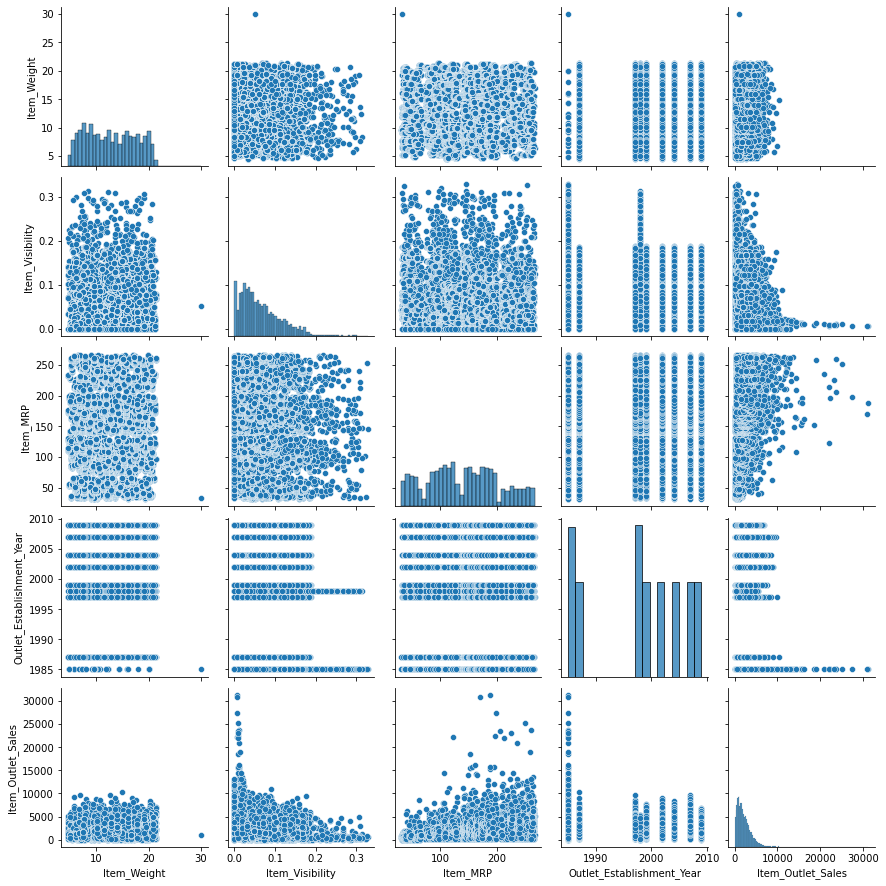

In [39]:
sns.pairplot(df)

<AxesSubplot:>

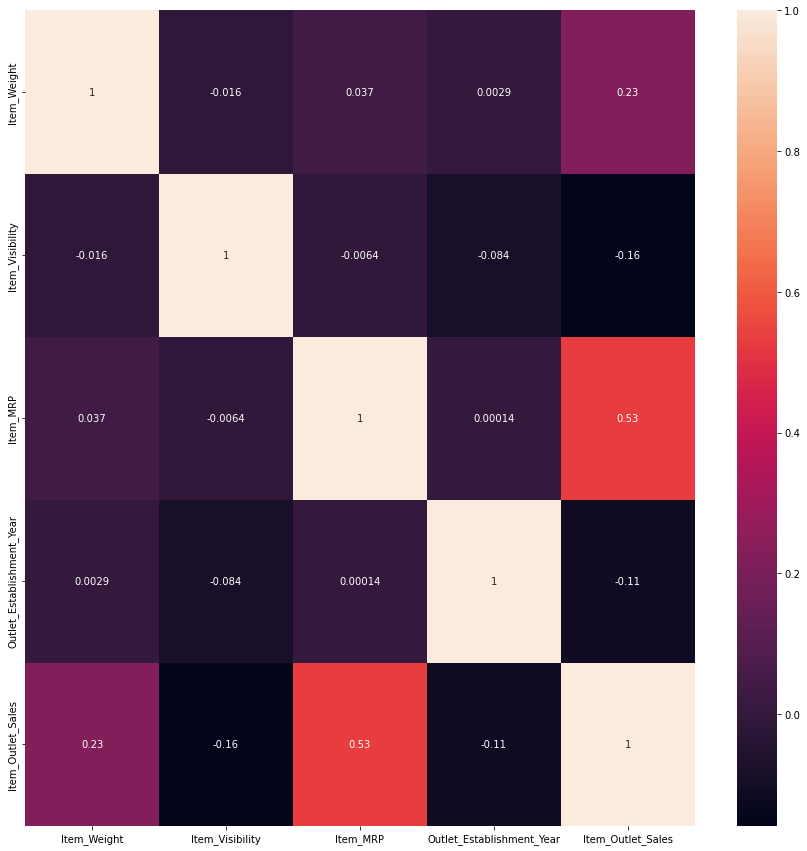

In [32]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot= True)

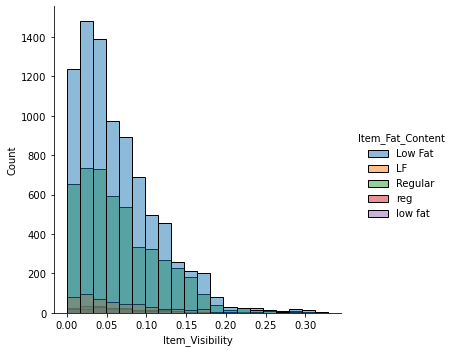

In [13]:
sns.displot(data = df, x = 'Item_Visibility', kind = 'hist', bins = 20, hue = 'Item_Fat_Content')

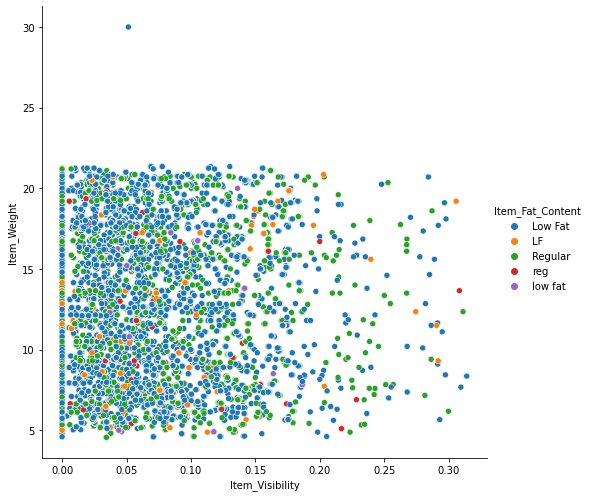

In [25]:
sns.relplot(data=df, x = 'Item_Visibility', y = 'Item_Weight', hue= 'Item_Fat_Content', kind = 'scatter', height= 7)

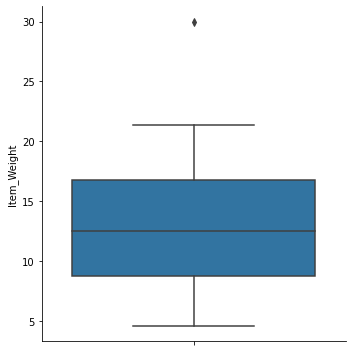

In [26]:
sns.catplot(data=df, y = 'Item_Weight', kind = 'box')

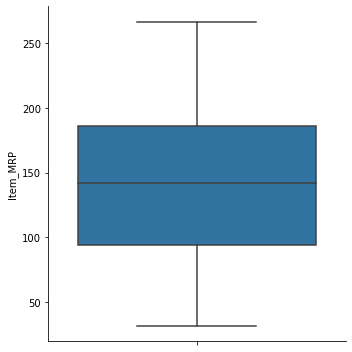

In [27]:
sns.catplot(data=df, y = 'Item_MRP', kind = 'box')

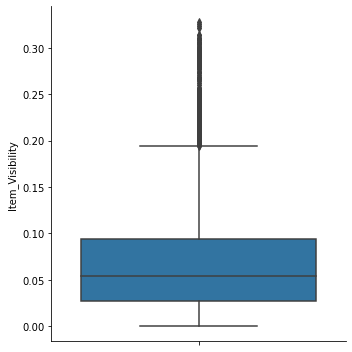

In [28]:
sns.catplot(data=df, y = 'Item_Visibility', kind = 'box')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

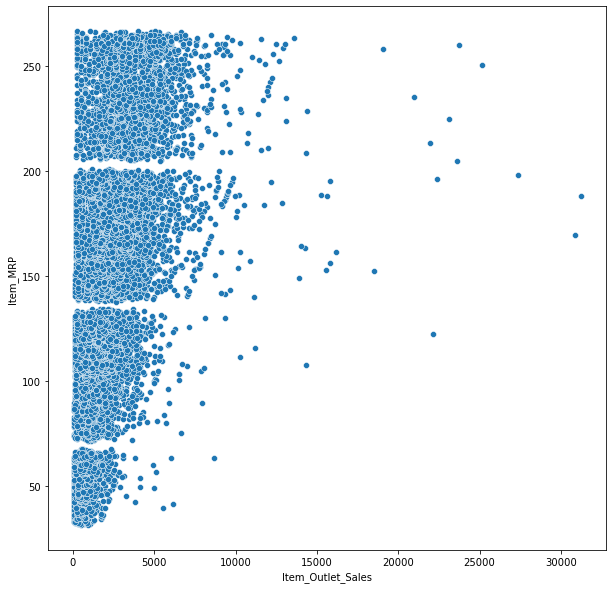

In [38]:
plt.figure(figsize= (10,10))
sns.scatterplot(data = df, x = 'Item_Outlet_Sales', y = 'Item_MRP')

# Data Preprocessing

In [40]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [41]:
# calculating mean of item_weight for each item type

mean_weight_by_item_type = df.groupby(['Item_Type'])['Item_Weight'].transform('mean')

In [42]:
# filling the Nan value in item_weight column by mean weight

df['Item_Weight'].fillna(mean_weight_by_item_type,inplace = True)

In [43]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [46]:
df.replace({'Item_Fat_Content' : {'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}}, inplace = True)

In [47]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [48]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [49]:
df.replace({'Item_Type' : {'Fruits and Vegetables' : 'Foods', 'Snack Foods' : 'Foods', 'Household' : 'Items', 
                           'Frozen Foods' : 'Foods', 'Dairy' : 'Foods', 'Baking Goods' : 'Foods', 'Canned' : 'Foods',
                          'Health and Hygiene' : 'Items', 'Meat' : 'Foods', 'Soft Drinks' : 'Foods', 'Breads' : 'Foods',
                          'Hard Drinks' : 'Foods', 'Starchy Foods' : 'Foods', 'Breakfast' : 'Foods', 'Seafood' : 'Foods'}},
                            inplace=True)

In [50]:
df['Item_Type'].value_counts()

Foods     11518
Items      2406
Others      280
Name: Item_Type, dtype: int64

In [51]:
df['Outlet_Size'].value_counts()

Medium    7122
Small     5529
High      1553
Name: Outlet_Size, dtype: int64

In [52]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [53]:
df['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [54]:
new_df = df.drop(columns = ['Item_Identifier', 'Outlet_Identifier'])

In [55]:
new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,12.300000,Low Fat,0.111448,Foods,33.4874,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,12.300000,Low Fat,0.111904,Foods,33.9874,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,12.300000,Low Fat,0.111728,Foods,33.9874,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,12.300000,Low Fat,0.000000,Foods,34.3874,1985,Small,Tier 1,Grocery Store,1719.370000
4,9.800000,Regular,0.045523,Foods,35.0874,2007,Medium,Tier 2,Supermarket Type1,352.874000
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,Low Fat,0.069606,Foods,261.9252,2004,Small,Tier 2,Supermarket Type1,4984.178800
14200,12.800000,Low Fat,0.070013,Foods,262.8252,2007,Medium,Tier 2,Supermarket Type1,2885.577200
14201,12.800000,Low Fat,0.069561,Foods,263.0252,1987,High,Tier 3,Supermarket Type1,2885.577200
14202,13.659758,Low Fat,0.069282,Foods,263.5252,1985,Medium,Tier 3,Supermarket Type3,3803.676434


In [56]:
data = pd.get_dummies(new_df, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 
                                         'Outlet_Type'], drop_first = True)

In [57]:
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Items,Item_Type_Others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,12.300000,0.111448,33.4874,1999,436.608721,0,0,0,1,0,0,0,1,0,0
1,12.300000,0.111904,33.9874,2007,443.127721,0,0,0,1,0,1,0,1,0,0
2,12.300000,0.111728,33.9874,2009,564.598400,0,0,0,1,0,0,1,0,1,0
3,12.300000,0.000000,34.3874,1985,1719.370000,0,0,0,0,1,0,0,0,0,0
4,9.800000,0.045523,35.0874,2007,352.874000,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0.069606,261.9252,2004,4984.178800,0,0,0,0,1,1,0,1,0,0
14200,12.800000,0.070013,262.8252,2007,2885.577200,0,0,0,1,0,1,0,1,0,0
14201,12.800000,0.069561,263.0252,1987,2885.577200,0,0,0,0,0,0,1,1,0,0
14202,13.659758,0.069282,263.5252,1985,3803.676434,0,0,0,1,0,0,1,0,0,1


# Define Target Variable (y) and Feature Variables (X)

In [59]:
x = data.drop('Item_Outlet_Sales', axis = 1)
y = data['Item_Outlet_Sales']

In [60]:
x.shape, y.shape

((14204, 14), (14204,))

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [62]:
 x_std = x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]

In [63]:
x_std

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,12.300000,0.111448,33.4874,1999
1,12.300000,0.111904,33.9874,2007
2,12.300000,0.111728,33.9874,2009
3,12.300000,0.000000,34.3874,1985
4,9.800000,0.045523,35.0874,2007
...,...,...,...,...
14199,12.800000,0.069606,261.9252,2004
14200,12.800000,0.070013,262.8252,2007
14201,12.800000,0.069561,263.0252,1987
14202,13.659758,0.069282,263.5252,1985


In [64]:
x_std = sc.fit_transform(x_std)

In [65]:
x_std

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [66]:
x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = pd.DataFrame(x_std, 
columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [68]:
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Items,Item_Type_Others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.115417,0.884136,-1.731787,0.139681,0,0,0,1,0,0,0,1,0,0
1,-0.115417,0.893006,-1.723734,1.095319,0,0,0,1,0,1,0,1,0,0
2,-0.115417,0.889583,-1.723734,1.334228,0,0,0,1,0,0,1,0,1,0
3,-0.115417,-1.281712,-1.717291,-1.532686,0,0,0,0,1,0,0,0,0,0
4,-0.703509,-0.397031,-1.706016,1.095319,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.002201,0.070990,1.947664,0.736955,0,0,0,0,1,1,0,1,0,0
14200,0.002201,0.078898,1.962160,1.095319,0,0,0,1,0,1,0,1,0,0
14201,0.002201,0.070120,1.965381,-1.293777,0,0,0,0,0,0,1,1,0,0
14202,0.204448,0.064694,1.973435,-1.532686,0,0,0,1,0,0,1,0,0,1


# Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2529)

In [71]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11363, 14), (2841, 14), (11363,), (2841,))

# Model Building

In [72]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(2529)

In [73]:
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=2529)

# Prediction

In [74]:
y_pred = rfr.predict(x_test)

In [75]:
y_pred

array([1393.67310463,  536.67618823, 1922.75957025, ..., 3273.22650743,
        557.84825121, 1054.92473736])

# Model Evaluation

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [77]:
mean_squared_error(y_test, y_pred)

1513044.840516854

In [78]:
mean_absolute_error(y_test, y_pred)

817.1806905602056

In [79]:
r2_score(y_test, y_pred)

0.5439279527477234

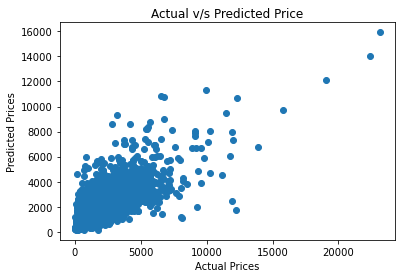

In [81]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual v/s Predicted Price')
plt.show()

# Explanation

This is a regression model build using RandomForestRegressor Algorithm to predict the sale of a particular item in an outlet using feature variables (Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type).

### Model Evaluation Results :

**MSE :** 1513044.840516854 <br>
**MAE :** 817.1806905602056 <br>
**R2 Score :** 0.5439279527477234 <br>
